<font size=24>2020级医疗数据处理实践-评测任务</font>

# 个人信息
- 班级：大数据2002
- 姓名：周华

# 任务
- 数据集：项目六
- 数据集文件：06.titanic-test.csv,06.titanic-train.csv
- 简要介绍：泰坦尼克号数据

# 代码部分

## 导入包

In [1]:
#导入常用包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd  
%matplotlib inline

#导入深度学习框架pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#导入机器学习包
from sklearn.linear_model import LogisticRegression   #逻辑回归
from sklearn.svm import SVC, LinearSVC                #SVC
from sklearn.ensemble import RandomForestClassifier   #随机森林
from sklearn.neighbors import KNeighborsClassifier    #KNN
from sklearn.naive_bayes import GaussianNB            #贝叶斯
from sklearn.linear_model import Perceptron           #感知机
from sklearn.linear_model import SGDClassifier        #SGD
from sklearn.tree import DecisionTreeClassifier       #决策树

#其他包
import warnings
warnings.filterwarnings("ignore")

## 数据读取

In [2]:
train=pd.read_csv('./input/06.titanic-train.csv')
test=pd.read_csv('./input/06.titanic-test.csv')
combine = [train, test]

## EDA（数据初探）

### 数据查看

#### 查看前5行数据

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color='#ff590b'><font size=5> 包含12个属性，分别为乘客Id，是否幸存，客舱等级，姓名，性别，年龄，同代亲属数，不同代亲属数，船票编号，床票价格，客舱号，登船港口</font><br/>

#### 查看数据行数列数

In [4]:
train.shape

(891, 12)

#### 查看数据基本信息

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 查看缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

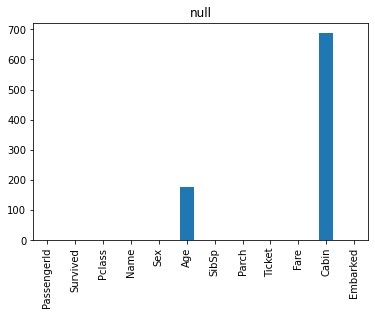

In [6]:
train.isnull().sum().plot(kind='bar',title='null')
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

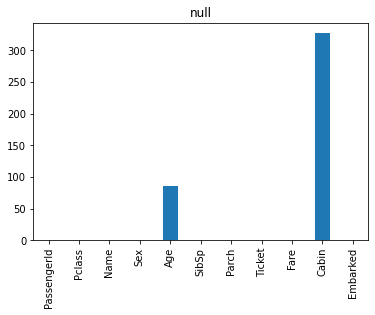

In [7]:
test.isnull().sum().plot(kind='bar',title='null')
test.isnull().sum()

<font color='#ff590b'><font size=5> age,cabin,embarke含有缺失值</font><br/>

####  查看数据统计信息

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 <font color='#ff590b'><font size=5> 各个属性数值均合理</font><br/>

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<font color='#ff590b'><font size=5>登船港口只有三种，S最多</font><br/>

### 单个属性数据探索

#### Survived

0    549
1    342
Name: Survived, dtype: int64

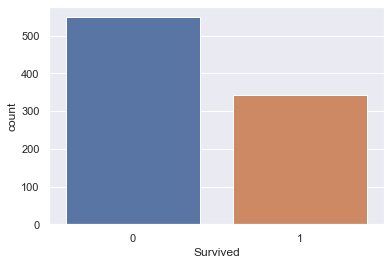

In [10]:
sns.set_theme(style="darkgrid")
sns.countplot(x=train.Survived,data=train)
train.Survived.value_counts()

In [11]:
train.Survived.value_counts()[1]/train.Survived.value_counts().sum()

0.3838383838383838

<font color='#ff590b'><font size=5> 幸存者比例为 $38.38 \%$</font><br/>

#### Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

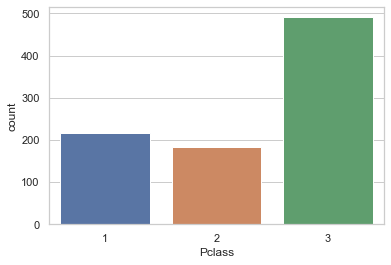

In [12]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train.Pclass,data=train)
train.Pclass.value_counts()

In [13]:
train.Pclass.value_counts() / train.Pclass.value_counts().sum()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

<font color='#ff590b'><font size=5> 三等仓人数最多，为55.1%，一等舱为24.2%，二等舱20.7%</font><br/>

#### Sex

male      577
female    314
Name: Sex, dtype: int64

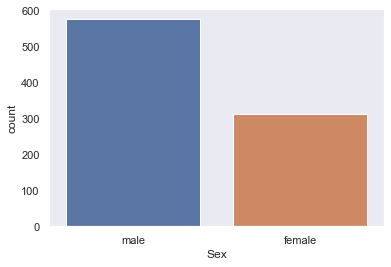

In [14]:
sns.set_theme(style="dark")
sns.countplot(x=train.Sex,data=train)
train.Sex.value_counts()

In [15]:
train.Sex.value_counts()/train.Sex.value_counts().sum()

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<font color='#ff590b'><font size=5> 男性更多，占64.76%</font><br/>

#### Age

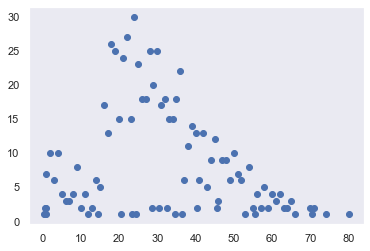

74.00     1
34.50     1
0.42      1
0.67      1
66.00     1
         ..
28.00    25
19.00    25
18.00    26
22.00    27
24.00    30
Name: Age, Length: 88, dtype: int64

In [16]:
plt.scatter(train.Age.value_counts().index,train.Age.value_counts())
plt.show()
train.Age.value_counts().sort_values(axis=0) 

<font color='#ff590b'><font size=5> 20岁-40岁的人比较多 </font><br/>

#### SibSp

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

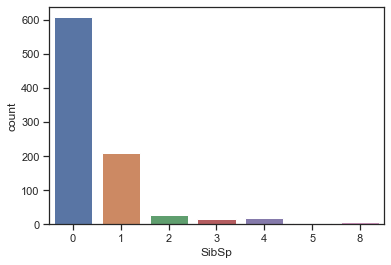

In [17]:
sns.set_theme(style="ticks")
sns.countplot(x=train.SibSp,data=train)
train.SibSp.value_counts()

In [18]:
train.SibSp.value_counts()/train.SibSp.value_counts().sum()

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

<font color='#ff590b'><font size=5> 68%的人没有同级亲属，23%的人有一个同级亲属，同级亲属有两个以上的很少</font><br/>

#### Parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

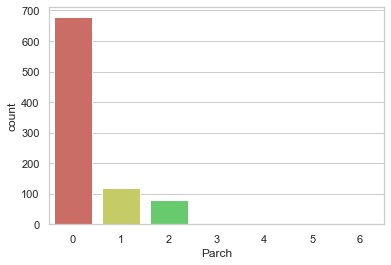

In [19]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train.Parch,data=train,palette=sns.color_palette("hls", 6))
train.Parch.value_counts()

In [20]:
train.Parch.value_counts()/train.Parch.value_counts().sum()

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

<font color='#ff590b'><font size=5>   76.1%的人没有非同级亲属，13%的人有一个非同级亲属   </font><br/>

#### Fare

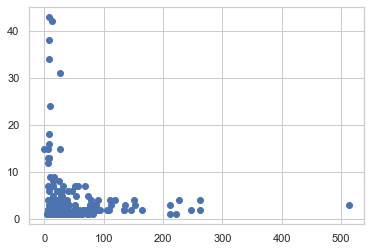

In [21]:
plt.scatter(train.Fare.value_counts().index,train.Fare.value_counts())
plt.show()

<font color='#ff590b'><font size=5>   大部分的船票在100美元以下   </font><br/>

#### Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

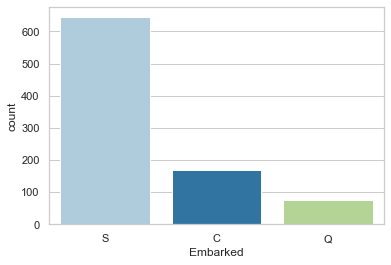

In [22]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train.Embarked,data=train,palette=sns.color_palette("Paired",3))
train.Embarked.value_counts()

In [23]:
train.Embarked.value_counts()/train.Embarked.value_counts().sum()

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

<font color='#ff590b'><font size=5>   72%的人从S上船，18%从C上船，只有8%的人从Q上船   </font><br/>

## 数据可视化（数据再探）

### 数据总体概览

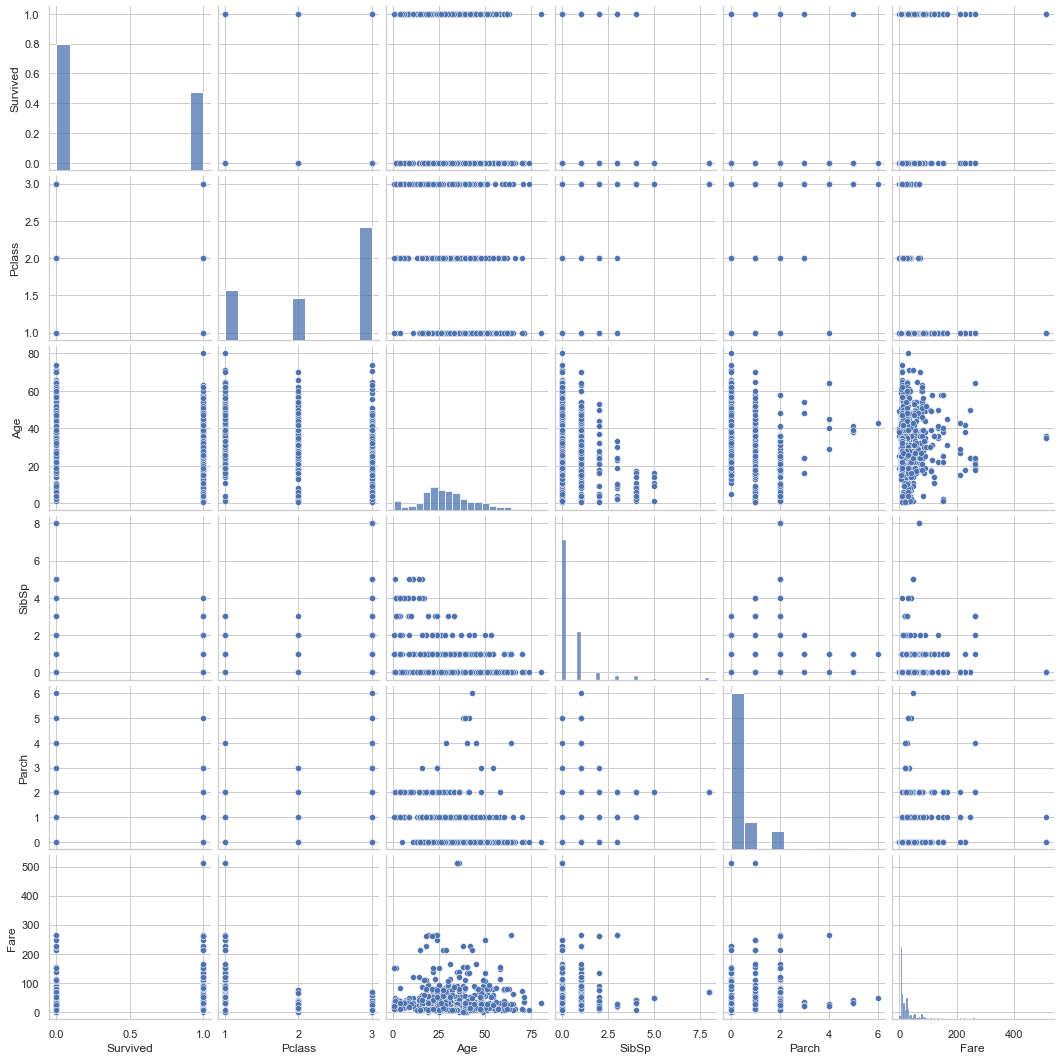

In [24]:
sns.pairplot(train.drop('PassengerId',axis=1))

### 二维数据

#### Fare与Pclass

-0.5494996199439078

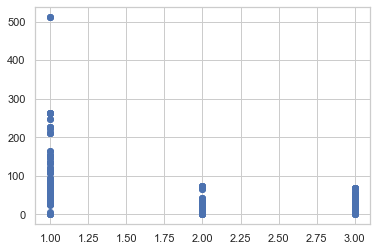

In [25]:
plt.scatter(train.Pclass,train.Fare)
train['Fare'].corr(train['Pclass'])

<font color='#ff590b'><font size=5> 费用与船舱等级具有较高的相关性，费用越多，船舱等级可能越高</font><br/>

#### Sex与Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

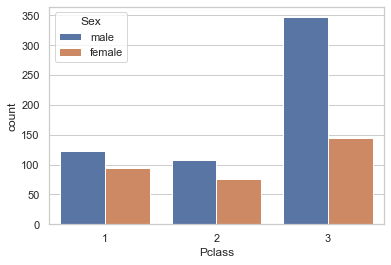

In [26]:
sns.countplot(x=train.Pclass, hue=train.Sex, data=train)

<font color='#ff590b'><font size=5> 各个船舱，男性均多余女性</font><br/>

#### Pclass与Survived

In [27]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


-0.33848103596101536

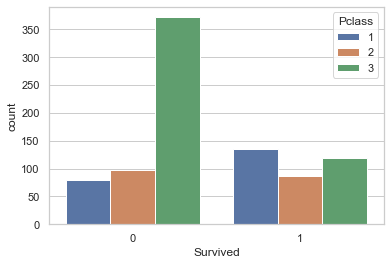

In [28]:
sns.countplot(x=train.Survived, hue=train.Pclass, data=train)
train['Survived'].corr(train['Pclass'])

<font color='#ff590b'><font size=5> 一等舱的幸存率最高，三等舱幸存率最低，幸存率与船舱有重要关系</font><br/>

#### Sex与Survived

In [29]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Survived', ylabel='count'>

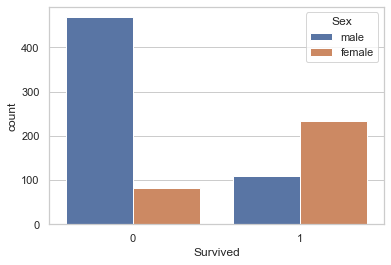

In [30]:
sns.countplot(x=train.Survived, hue=train.Sex, data=train)

<font color='#ff590b'><font size=5> 女性的生存率远高于男性，可以推断发生灾难时，许多男性把生存机会留给了女性</font><br/>

#### Age与Survived

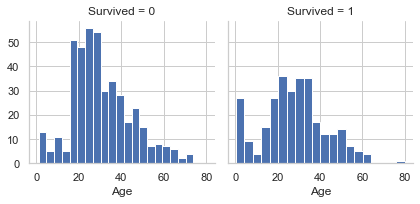

In [31]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<font color='#ff590b'><font size=5> 孩子和老人的生存率明显高于死亡率，而成年的死亡率明显高于生存率，可以推断发生灾难时，许多成年把生存机会留给了孩子和老人</font><br/>

#### SibSp与Survived

In [32]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


-0.03532249888573559

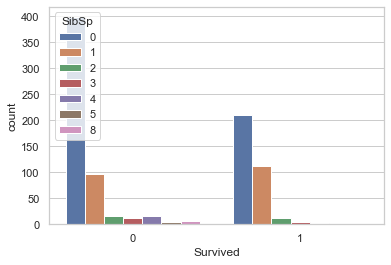

In [33]:
sns.countplot(x=train.Survived, hue=train.SibSp, data=train)
train['Survived'].corr(train['SibSp'])

<font color='#ff590b'><font size=5> 相关性较弱</font><br/>

#### Parch与Survived

In [34]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


0.08162940708348349

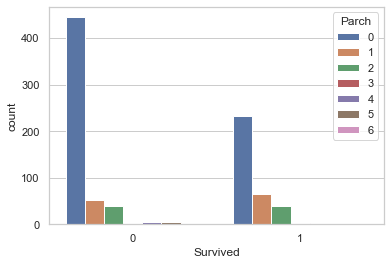

In [35]:
sns.countplot(x=train.Survived, hue=train.Parch, data=train)
train['Survived'].corr(train['Parch'])

<font color='#ff590b'><font size=5> 相关性较弱</font><br/>

#### Fare与Survived

0.2573065223849624

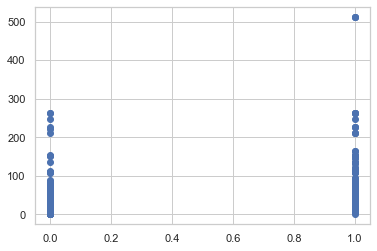

In [36]:
plt.scatter(train.Survived,train.Fare)
train['Survived'].corr(train['Fare'])

In [37]:
train.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

<font color='#ff590b'><font size=5>船费更高的倾向于更高的的生存率</font><br/>

#### Embarked与Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

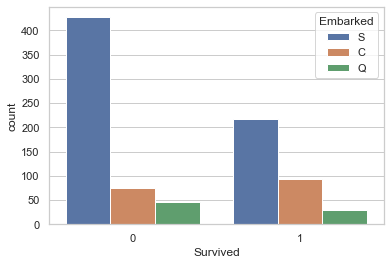

In [38]:
sns.countplot(x=train.Survived, hue=train.Embarked, data=train)

<font color='#ff590b'><font size=5> 相关性较弱</font><br/>

### 三维数据

#### Sex与Survived,Pclass

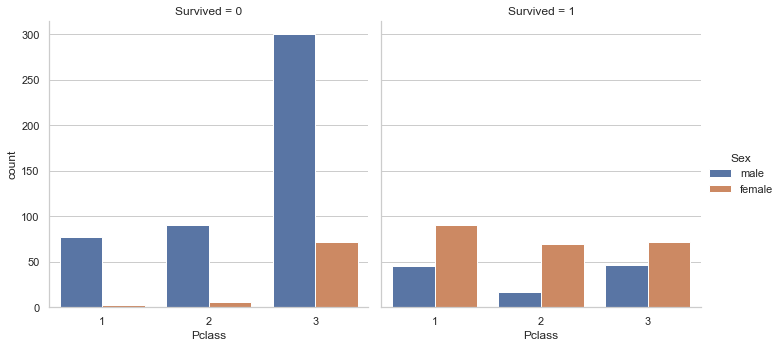

In [39]:
sns.catplot(x="Pclass", 
            hue="Sex", 
            col="Survived",
            data=train, 
            kind="count")

<font color='#ff590b'><font size=5> 各个等级船舱，女性生存率高于男性;高等级船舱生存率更高</font><br/>

#### Age与Survived,Pclass

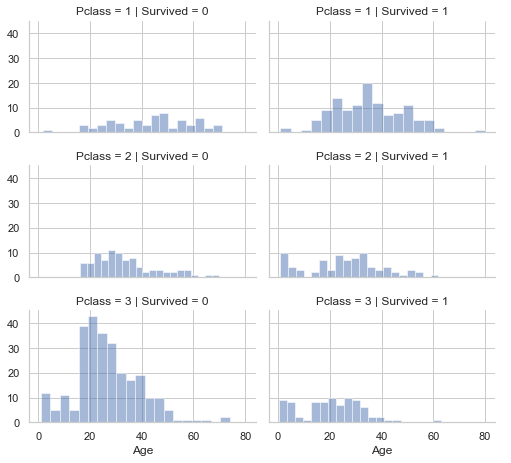

In [40]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<font color='#ff590b'><font size=5> 船舱一，死亡数较少；船舱二，死亡数中等；船舱三，孩子死亡少，成年死亡多</font><br/>

#### SibSp与Survived,Pclass

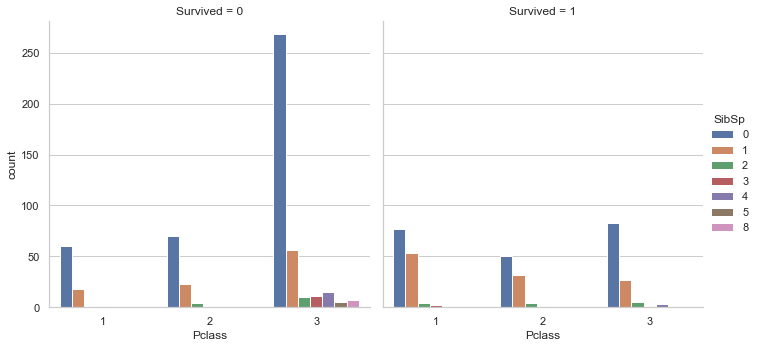

In [41]:
sns.catplot(x="Pclass", 
            hue="SibSp", 
            col="Survived",
            data=train, 
            kind="count")

<font color='#ff590b'><font size=5> 相关性较弱</font><br/>

#### Parch与Survived,Pclass

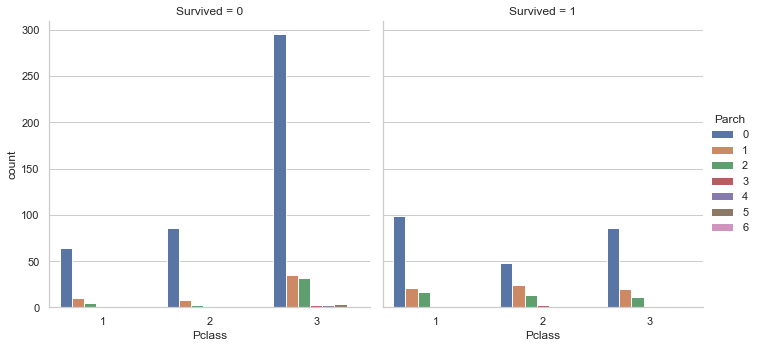

In [42]:
sns.catplot(x="Pclass", 
            hue="Parch", 
            col="Survived",
            data=train, 
            kind="count")

<font color='#ff590b'><font size=5> 相关性较弱</font><br/>

#### Embarked与Survived,Pclass

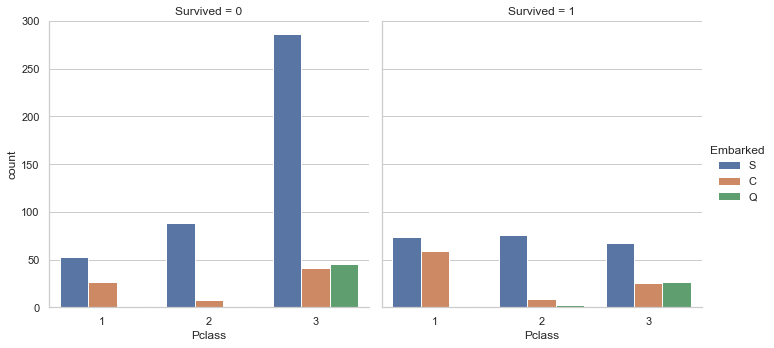

In [43]:
sns.catplot(x="Pclass", 
            hue="Embarked", 
            col="Survived",
            data=train, 
            kind="count")

<font color='#ff590b'><font size=5> 相关性较弱</font><br/>

### 四维数据

#### Embarked,Sex,Pclass与Survived

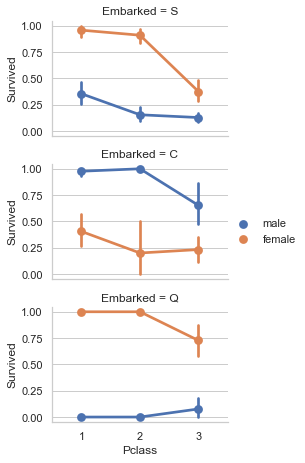

In [44]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

<font color='#ff590b'><font size=5> S和Q上岸的人，女性生存率高于男性；一等舱，二等舱的生存率比三等舱高<font color='#ff590b'><font size=5> 相关性较弱</font><br/></font><br/>

#### Fare,Sex,Embarked与Survived

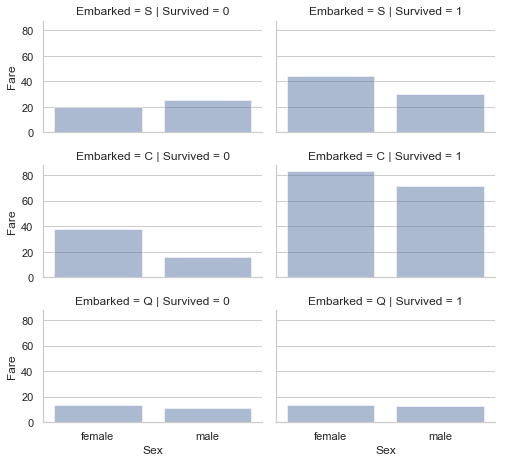

In [45]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<font color='#ff590b'><font size=5> 幸存的人倾向于更高的船费；Q上岸的人倾向于更高的船费；男性倾向于更高的船费</font><br/>

## 特征工程

### 数据预处理

#### 剔除ticket,PassengerId,cabin

<font color='#ff590b'><font size=5> ticket,PassengerId信息无用，cabin缺失值过多，将二者剔除 </font><br/>

In [46]:
(train.shape,test.shape)

((891, 12), (418, 11))

In [47]:
train = train.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
test = test.drop(['Ticket', 'Cabin','PassengerId'], axis=1)           #剔除数据

In [48]:
(train.shape,test.shape)

((891, 9), (418, 8))

#### Sex装换为值

In [49]:
for i in range(train.shape[0]):
    if train['Sex'][i]=='male':
        train['Sex'][i]=0.5
    elif train['Sex'][i]=='female':
        train['Sex'][i]=-0.5
        
for i in range(test.shape[0]):
    if test['Sex'][i]=='male':
        test['Sex'][i]=0.5
    elif test['Sex'][i]=='female':
        test['Sex'][i]=-0.5
        
train['Sex']=train['Sex'].astype(float)
test['Sex']=test['Sex'].astype(float)

In [50]:
train['Sex']

0      0.5
1     -0.5
2     -0.5
3     -0.5
4      0.5
      ... 
886    0.5
887   -0.5
888   -0.5
889    0.5
890    0.5
Name: Sex, Length: 891, dtype: float64

#### Embarked缺失值填充并装换为值

<font color='#ff590b'><font size=5> 考虑到Embarked只缺失了两个数据，考虑人工填充相邻值</font><br/>

In [51]:
train[train['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",-0.5,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",-0.5,62.0,0,0,80.0,NaN


In [52]:
train[train['Survived']==1][train['Pclass']==1][train['Sex']==-0.5][train['SibSp']==0][train['Parch']==0]  #选出Survived，Pclass，Sex，SibSp parch与缺失数据相同的行

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
11,1,1,"Bonnell, Miss. Elizabeth",-0.5,58.0,0,0,26.5500,S
61,1,1,"Icard, Miss. Amelie",-0.5,38.0,0,0,80.0000,NaN
194,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",-0.5,44.0,0,0,27.7208,C
195,1,1,"Lurette, Miss. Elise",-0.5,58.0,0,0,146.5208,C
218,1,1,"Bazzani, Miss. Albina",-0.5,32.0,0,0,76.2917,C
256,1,1,"Thorne, Mrs. Gertrude Maybelle",-0.5,NaN,0,0,79.2000,C
257,1,1,"Cherry, Miss. Gladys",-0.5,30.0,0,0,86.5000,S
258,1,1,"Ward, Miss. Anna",-0.5,35.0,0,0,512.3292,C
269,1,1,"Bissette, Miss. Amelia",-0.5,35.0,0,0,135.6333,S
290,1,1,"Barber, Miss. Ellen ""Nellie""",-0.5,26.0,0,0,78.8500,S


In [53]:
train[train['Survived']==1][train['Pclass']==1][train['Sex']==-0.5][train['SibSp']==0][train['Parch']==0]['Embarked'].value_counts() #查看计数

C    17
S    14
Name: Embarked, dtype: int64

In [54]:
train['Embarked'].fillna('C' ,inplace=True)     #用C填充

In [55]:
train[train['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


<font color='#ff590b'><font size=5> 下面将Embarked装换为数值</font><br/>

In [56]:
train['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [57]:
#将数据集中的C,S,Q替换为数值
for i in range(train.shape[0]):
    if train['Embarked'][i]=='C':
        train['Embarked'][i]=-0.4
    elif train['Embarked'][i]=='S':
        train['Embarked'][i]=0.1
    elif train['Embarked'][i]=='Q':
        train['Embarked'][i]=0.6
        
for i in range(test.shape[0]):
    if test['Embarked'][i]=='C':
        test['Embarked'][i]=-0.4
    elif test['Embarked'][i]=='S':
        test['Embarked'][i]=0.1
    elif test['Embarked'][i]=='Q':
        test['Embarked'][i]=0.6
        
train['Embarked']=train['Embarked'].astype(float)      
test['Embarked']=test['Embarked'].astype(float)

In [58]:
train['Embarked']

0      0.1
1     -0.4
2      0.1
3      0.1
4      0.1
      ... 
886    0.1
887    0.1
888    0.1
889   -0.4
890    0.6
Name: Embarked, Length: 891, dtype: float64

#### SibSp与Parch

<font color='#ff590b'><font size=5> SibSp与Parch表示的都是亲属，将其合并 </font><br/>

In [59]:
#亲属包括自己，加1
train['family']=train['SibSp']+train['Parch']+1
test['family']=test['SibSp']+test['Parch']+1

In [60]:
#删除SibSp，Parch
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)
combine = [train, test]

In [61]:
test

,Pclass,Name,Sex,Age,Fare,Embarked,family
0,3,"Kelly, Mr. James",0.5,34.5,7.8292,0.6,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",-0.5,47.0,7.0000,0.1,2
2,2,"Myles, Mr. Thomas Francis",0.5,62.0,9.6875,0.6,1
3,3,"Wirz, Mr. Albert",0.5,27.0,8.6625,0.1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",-0.5,22.0,12.2875,0.1,3
...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0.5,NaN,8.0500,0.1,1
414,1,"Oliva y Ocana, Dona. Fermina",-0.5,39.0,108.9000,-0.4,1
415,3,"Saether, Mr. Simon Sivertsen",0.5,38.5,7.2500,0.1,1
416,3,"Ware, Mr. Frederick",0.5,NaN,8.0500,0.1,1


#### Name信息提取

In [62]:
#获取称呼
for dataset in combine:
    dataset['call'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['call'], train['Sex'])

Sex,-0.5,0.5
call,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [63]:
#将称呼统一归类并查看比例
for dataset in combine:
    dataset['call'] = dataset['call'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'other')
    dataset['call'] = dataset['call'].replace('Mlle', 'Miss')
    dataset['call'] = dataset['call'].replace('Ms', 'Miss')
    dataset['call'] = dataset['call'].replace('Mme', 'Mrs')
    
train[['call', 'Survived']].groupby(['call'], as_index=False).mean()

,call,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,other,0.347826


In [64]:
#用数值替换称呼
call_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "other": 5}
for dataset in combine:
    dataset['call'] = dataset['call'].map(call_mapping)
    dataset['call'] = dataset['call'].fillna(0)

train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family,call
0,0,3,"Braund, Mr. Owen Harris",0.5,22.0,7.2500,0.1,2,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-0.5,38.0,71.2833,-0.4,2,3
2,1,3,"Heikkinen, Miss. Laina",-0.5,26.0,7.9250,0.1,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-0.5,35.0,53.1000,0.1,2,3
4,0,3,"Allen, Mr. William Henry",0.5,35.0,8.0500,0.1,1,1


In [65]:
#剔除Name
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]

In [66]:
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,family,call
0,0,3,0.5,22.0,7.2500,0.1,2,1
1,1,1,-0.5,38.0,71.2833,-0.4,2,3
2,1,3,-0.5,26.0,7.9250,0.1,1,2


### 缺失值处理

#### Fare的填充及其归一化

In [67]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,Fare,Embarked,family,call
152,3,0.5,60.5,NaN,0.1,1,1


In [68]:
#用中位数进行填充
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [69]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,Fare,Embarked,family,call


In [70]:
#Fare归一化
train['Fare']=(train['Fare']-train['Fare'].min())/train['Fare'].max()-train['Fare'].min()
test['Fare']=(test['Fare']-test['Fare'].min())/test['Fare'].max()-test['Fare'].min()
test['Fare']

0      0.015282
1      0.013663
2      0.018909
3      0.016908
4      0.023984
         ...   
413    0.015713
414    0.212559
415    0.014151
416    0.015713
417    0.043640
Name: Fare, Length: 418, dtype: float64

#### age的预测填充及其归一化

<font color='#ff590b'><font size=5> 下面使用神经网络对Age进行预测 </font><br/>

In [71]:
#搭建神经网络
class agenet(nn.Module):

    def __init__(self):
        super(agenet, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Linear(6, 10)
        )
        self.conv2 = nn.Sequential(
           nn.Linear(10, 12)
        )
        self.conv3 = nn.Sequential(
           nn.Linear(12, 7)
        ) 
        self.conv4 = nn.Sequential(
           nn.Linear(7, 4)
        ) 
     
        self.outlayer = nn.Linear(4, 1)

    def forward(self, x):
        """

        :param x:
        :return:
        """
    
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.outlayer(x)
        return x

<font color='#ff590b'><font size=5> 生成训练集，测试集 </font><br/>

In [72]:
#生成训练集
x=pd.concat(
    [train.dropna()
    .drop('Survived',axis=1)
    .drop('Age',axis=1)
    ,test.dropna()
    .drop('Age',axis=1)]
    ,axis=0
    ,join='outer',ignore_index=True)

#生成训练集标签
x_label=pd.concat(
    [train.dropna()['Age']
    ,test.dropna()['Age']]
    ,axis=0
    ,join='outer',ignore_index=True)

#数据转换
x_label=torch.from_numpy(np.array(x_label)).to(torch.float32)

In [73]:
#正常test测试集
pred=pd.concat(
    [
    train[train.isnull().values==True].drop('Survived',axis=1).drop('Age',axis=1)
    ,
    test[test.isnull().values==True].drop('Age',axis=1)
    ]
    ,axis=0
    ,join='outer',ignore_index=True)

#数据装换
pred=torch.from_numpy(np.array(pred)).to(torch.float32)

<font color='#ff590b'><font size=5> 模型训练 </font><br/>

In [74]:
model=agenet()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
train_tensor=torch.from_numpy(np.array(x[0:700])).to(torch.float32)
test_tensor=torch.from_numpy(np.array(x[700:])).to(torch.float32)
losses=[]      #记录损失值
step=[]        #记录训练次数
total_loss=0   #总损失
for i in range(50):
    for j in range(700):
        temp=torch.zeros(1,6)
        temp[0]=train_tensor[j]
        model.train()
        optimizer.zero_grad()     #剃度清零
        logits = model(temp)
        loss_fn=nn.MSELoss()      #损失函数
        loss= loss_fn(logits,x_label[j])
        total_loss=+loss
    total_loss/=700
    total_loss.backward()         #反向传播
    losses.append(total_loss.item())
    step.append(i)
    optimizer.step()    #调节权重

<font color='#ff590b'><font size=5> 效果可以，似乎有些过拟合 </font><br/>

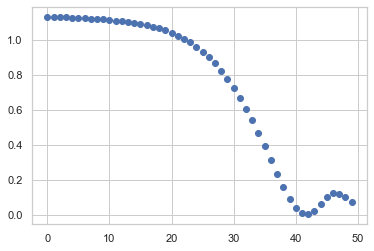

In [75]:
plt.scatter(step,losses)

In [76]:
#预测测试集数据
predit=[]
for j in range(1046-700):
    temp1=torch.zeros(1,6)
    temp1[0]=test_tensor[j]
    predit.append(model(temp1).detach().numpy() )

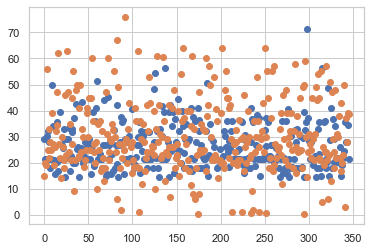

In [77]:
#画图查看效果
plt.scatter(range(1046-700),predit)
plt.scatter(range(1046-700),x_label[700:])

<font color='#ff590b'><font size=5> 似乎有些偏差，但并不影响 ，下面使用神经网络预测填充缺失值</font><br/>

In [78]:
#获取缺失值索引
index=pd.concat(
    [
    train[train.isnull().values==True]['Age']
    ,
    test[test.isnull().values==True]['Age']
    ]
    ,axis=0
    ,join='outer').index

In [79]:
#使用神经网络预测缺失值
predit_=[]
for j in range(263):
    temp1=torch.zeros(1,6)
    temp1[0]=pred[j]
    predit_.append(model(temp1).detach().numpy()[0,0] )

In [80]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
family        0
call          0
dtype: int64

In [81]:
#填充缺失值
train['Age'].fillna(pd.Series(predit_[0:177],index[0:177]),inplace=True)
test['Age'].fillna(pd.Series(predit_[177:],index[177:]),inplace=True)

In [82]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
family      0
call        0
dtype: int64

In [83]:
#对数据进行归一化
train['Age']=(train['Age']-train['Age'].min())/train['Age'].max()-train['Age'].min()
test['Age']=(test['Age']-test['Age'].min())/test['Age'].max()-test['Age'].min()
test['Age']

0      0.281711
1      0.446184
2      0.643553
3      0.183026
4      0.117237
         ...   
413    0.111138
414    0.340921
415    0.334342
416    0.111138
417    0.383990
Name: Age, Length: 418, dtype: float64

### 模型训练与模型验证

In [84]:
#数据集划分
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

#### 逻辑回归

In [85]:
#逻辑回归
logreg = LogisticRegression()
logreg.fit(X_train[0:700], Y_train[0:700])
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_log

82.2

In [86]:
#查看Survived与其他属性的相关性
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Fare,0.558564
6,call,0.483823
4,Embarked,-0.261221
5,family,-0.265438
0,Pclass,-0.868191
2,Age,-1.634762
1,Sex,-2.272243


#### 支持向量机

In [87]:
#SVM
svc = SVC()
svc.fit(X_train[0:700], Y_train[0:700])
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_svc

85.34

#### KNN

In [88]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train[0:700], Y_train[0:700])
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_knn

80.1

#### 朴素贝叶斯

In [89]:
#朴素贝叶斯
gaussian = GaussianNB()
gaussian.fit(X_train[0:700], Y_train[0:700])
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_gaussian

81.68

#### 感知机

In [90]:
#感知机
perceptron = Perceptron()
perceptron.fit(X_train[0:700], Y_train[0:700])
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_perceptron

79.58

#### 线性SVC

In [91]:
#线性SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train[0:700], Y_train[0:700])
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_linear_svc

82.72

#### 随机剃度下降

In [92]:
#随机剃度下降
sgd = SGDClassifier()
sgd.fit(X_train[0:700], Y_train[0:700])
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_sgd

78.01

#### 决策树

In [93]:
#决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train[0:700], Y_train[0:700])
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_decision_tree

75.92

#### 随机森林

In [94]:
#随机森林
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train[0:700], Y_train[0:700])
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train[700:], Y_train[700:])
acc_random_forest = round(random_forest.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_random_forest

81.15

In [95]:
#模型比较
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,85.34
7,Linear SVC,82.72
2,Logistic Regression,82.20
4,Naive Bayes,81.68
3,Random Forest,81.15
1,KNN,80.10
5,Perceptron,79.58
6,Stochastic Gradient Decent,78.01
8,Decision Tree,75.92


## 模型调参(网格搜索)

<font color='#ff590b'><font size=5> 选择随机森林，支持向量机，KNN，决策树网格搜索调参数 </font><br/>

### 随机森林

#### n_estimators

In [126]:
# n_estimatorsw参数优化
scores_n=[]
for i in range(10,150,5):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train[0:700], Y_train[0:700])
    Y_pred = random_forest.predict(X_test)
    random_forest.score(X_train[700:], Y_train[700:])
    acc_random_forest = round(random_forest.score(X_train[700:], Y_train[700:]) * 100, 2)
    scores_n.append([i,acc_random_forest])

In [127]:
scores_n

[[10, 84.82],
 [15, 82.72],
 [20, 82.2],
 [25, 80.1],
 [30, 80.63],
 [35, 82.72],
 [40, 82.2],
 [45, 83.25],
 [50, 81.15],
 [55, 81.15],
 [60, 81.15],
 [65, 81.68],
 [70, 80.63],
 [75, 81.68],
 [80, 82.72],
 [85, 81.15],
 [90, 82.2],
 [95, 81.15],
 [100, 82.2],
 [105, 81.68],
 [110, 79.58],
 [115, 83.25],
 [120, 83.25],
 [125, 81.68],
 [130, 80.63],
 [135, 82.2],
 [140, 82.2],
 [145, 82.2]]

In [98]:
scores_n

[[10, 82.72],
 [15, 82.72],
 [20, 80.63],
 [25, 80.1],
 [30, 81.15],
 [35, 81.68],
 [40, 81.15],
 [45, 80.1],
 [50, 82.2],
 [55, 79.06],
 [60, 83.25],
 [65, 83.25],
 [70, 80.63],
 [75, 81.68],
 [80, 82.2],
 [85, 81.15],
 [90, 82.2],
 [95, 80.63],
 [100, 81.15],
 [105, 82.72],
 [110, 81.68],
 [115, 81.68],
 [120, 80.63],
 [125, 82.2],
 [130, 82.2],
 [135, 81.68],
 [140, 81.68],
 [145, 82.72]]

#### max_features

In [99]:
#max_features参数优化
num_m=[]
scores_m=[]
for i in range(1,8):
    random_forest = RandomForestClassifier(n_estimators=85,max_features=i)
    random_forest.fit(X_train[0:700], Y_train[0:700])
    Y_pred = random_forest.predict(X_test)
    random_forest.score(X_train[700:], Y_train[700:])
    acc_random_forest = round(random_forest.score(X_train[700:], Y_train[700:]) * 100, 2)
    num_m.append(i)
    scores_m.append(acc_random_forest)

In [125]:
scores_m

[81.15, 80.63, 82.2, 82.72, 80.1, 81.15, 81.68]

In [122]:
#同时优化两个参数
scores_t=[]
for i in range(1,8):
    for j in range(10,100,5):
        random_forest = RandomForestClassifier(n_estimators=j,max_features=i)
        random_forest.fit(X_train[0:700], Y_train[0:700])
        Y_pred = random_forest.predict(X_test)
        random_forest.score(X_train[700:], Y_train[700:])
        acc_random_forest = round(random_forest.score(X_train[700:], Y_train[700:]) * 100, 2)
        scores_t.append([i,j,acc_random_forest])

In [123]:
scores_t[35:40]

[[2, 95, 81.68], [3, 10, 81.15], [3, 15, 80.1], [3, 20, 80.1], [3, 25, 80.63]]

### KNN

In [103]:
#n_neighbors参数优化
num_knn=[]
scores_knn=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train[0:700], Y_train[0:700])
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train[700:], Y_train[700:]) * 100, 2)
    num_knn.append(i)
    scores_knn.append(acc_knn)

In [104]:
scores_knn

[72.25, 81.15, 80.1, 81.15, 80.63, 81.68, 83.77, 82.2, 82.2]

### 决策树

In [105]:
#max_depth参数优化
scores_dec=[]
for i in range(1,20):
    decision_tree = DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(X_train[0:700], Y_train[0:700])
    Y_pred = decision_tree.predict(X_test)
    acc_decision_tree = round(decision_tree.score(X_train[700:], Y_train[700:]) * 100, 2)
    scores_dec.append([i,acc_decision_tree])

In [106]:
scores_dec

[[1, 79.06],
 [2, 80.63],
 [3, 85.34],
 [4, 84.29],
 [5, 82.72],
 [6, 82.72],
 [7, 83.77],
 [8, 82.72],
 [9, 81.15],
 [10, 81.15],
 [11, 76.96],
 [12, 76.44],
 [13, 76.44],
 [14, 75.39],
 [15, 74.87],
 [16, 75.92],
 [17, 75.92],
 [18, 76.44],
 [19, 75.92]]

### 支持向量机

In [107]:
#C参数优化
scores_svc=[]
for i in range(1,10):
    svc = SVC(C=i*0.1)
    svc.fit(X_train[0:700], Y_train[0:700])
    Y_pred = svc.predict(X_test)
    acc_svc = round(svc.score(X_train[700:], Y_train[700:]) * 100, 2)
    scores_svc.append([i*0.1,acc_svc])

In [108]:
scores_svc

[[0.1, 83.77],
 [0.2, 83.77],
 [0.30000000000000004, 83.77],
 [0.4, 84.82],
 [0.5, 85.86],
 [0.6000000000000001, 84.82],
 [0.7000000000000001, 85.34],
 [0.8, 85.34],
 [0.9, 85.34]]

## 模型融合(Stacking)

In [109]:
#使用最优参数预测并查看SVC准确率
svc = SVC(C=0.5)
svc.fit(X_train[0:700], Y_train[0:700])
Y1 = svc.predict(X_train[700:])
acc_svc = round(svc.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_svc

85.86

In [110]:
#使用最优参数预测并查看KNN准确率
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train[0:700], Y_train[0:700])
Y_2 = knn.predict(X_train[700:])
acc_knn = round(knn.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_knn

81.15

In [120]:
#使用最优参数预测并查看随机森林准确率
random_forest = RandomForestClassifier(n_estimators=10,max_features=3)
random_forest.fit(X_train[0:700], Y_train[0:700])
Y_3 = random_forest.predict(X_train[700:])
acc_random_forest=random_forest.score(X_train[700:], Y_train[700:])*100
acc_random_forest

80.6282722513089

In [112]:
#使用最优参数预测并查看决策树准确率
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train[0:700], Y_train[0:700])
Y_4 = decision_tree.predict(X_train[700:])
acc_decision_tree = round(decision_tree.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_decision_tree

85.34

In [113]:
#使用最优参数预测并查看逻辑回归准确率
logreg = LogisticRegression()
logreg.fit(X_train[0:700], Y_train[0:700])
Y_5 = logreg.predict(X_train[700:])
acc_log = round(logreg.score(X_train[700:], Y_train[700:]) * 100, 2)
acc_log

82.2

In [114]:
#Stacking模型第二步
Y=Y1+Y_2+Y_3+Y_4+Y_5

In [115]:
Y

array([5, 2, 3, 0, 0, 0, 5, 1, 5, 4, 5, 1, 0, 1, 0, 0, 5, 5, 0, 0, 5, 0,
       1, 0, 0, 0, 5, 5, 0, 4, 5, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 5, 0,
       0, 3, 0, 5, 0, 1, 5, 4, 0, 0, 5, 5, 0, 0, 0, 3, 0, 0, 0, 5, 0, 5,
       2, 5, 0, 0, 0, 0, 5, 0, 5, 0, 0, 4, 0, 5, 3, 5, 2, 0, 0, 0, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 3, 4, 0, 4, 1, 5, 5, 4, 0, 0, 1, 4, 0, 5,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 1, 4, 0, 0, 2, 5, 0, 5, 3, 5,
       0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 5, 0, 0, 5, 5,
       5, 3, 5, 0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 1, 0, 4, 0, 5, 1, 0, 5, 3,
       0, 0, 0, 5, 5, 0, 5, 0, 0, 0, 1, 5, 3, 0, 1], dtype=int64)

In [116]:
#得出最终预测结果
Y[Y<3]=0
Y[Y>=3]=1


In [117]:
Y

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [118]:
#计算预测准确个数
(Y==Y_train[700:]).sum()

164

In [119]:
#计算准确率
(Y==Y_train[700:]).sum()/191*100

85.86387434554975

# 收获与感悟

- <font color='#ff590b'><font size=5> miniconda 现在知道为什么推荐miniconda而不是conda了，包多了真的很卡 </font><br/>
- <font color='#ff590b'><font size=5> 第一次学到网格搜索，没想到超参数还可以这么调 </font><br/>
- <font color='#ff590b'><font size=5> 特征工程真的太重要了，怎样充分的利用每一个信息，才能使得模型最优，全靠特征工程 </font><br/>
- <font color='#ff590b'><font size=5> 数据分析就是要利用每一点有用的信息，充分探索数据之间的关系 </font><br/>